# Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import os

# Loading a dataset

In [2]:
path = "../input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print("One example:", files[0])

Total samples: 23708
One example: 26_0_2_20170104023102422.jpg.chip.jpg


**Format of the file: age_gender_ethnicity_datetime**

**Gender:
0 for Male,
1 for Female**

In [3]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

In [4]:
# print(images[1])
# print(ages[1])
# print(genders[1])
print("length of list of ages:" ,len(ages))
print("length of list of genders:" ,len(genders))
print("length of list of images:" ,len(images))

length of list of ages: 23708
length of list of genders: 23708
length of list of images: 23708


In [5]:
from collections import Counter
print("Ages:", Counter(ages))
print("\n")
print("Genders:",Counter(genders))
print("\n")
print("No. of unique values in ages:", len(Counter(ages)))
print("No. of unique values in genders:", len(Counter(genders)))

Ages: Counter({'26': 2197, '1': 1123, '28': 918, '35': 880, '24': 859, '25': 734, '30': 724, '32': 664, '27': 615, '29': 570, '40': 526, '36': 483, '2': 482, '45': 440, '23': 426, '34': 409, '22': 395, '50': 381, '54': 353, '31': 350, '21': 346, '38': 325, '37': 293, '60': 293, '3': 289, '20': 284, '4': 273, '58': 271, '55': 268, '42': 266, '39': 266, '8': 263, '18': 262, '65': 259, '16': 247, '53': 241, '56': 236, '52': 232, '5': 196, '15': 177, '47': 170, '9': 166, '61': 161, '17': 158, '14': 157, '43': 157, '10': 156, '85': 155, '46': 153, '48': 153, '75': 148, '49': 148, '70': 147, '33': 143, '7': 139, '51': 138, '80': 133, '41': 132, '6': 131, '12': 130, '62': 125, '63': 103, '44': 100, '68': 100, '72': 98, '19': 98, '57': 97, '67': 94, '90': 82, '59': 82, '13': 81, '66': 77, '78': 69, '11': 65, '73': 63, '76': 58, '69': 56, '64': 50, '82': 40, '86': 35, '88': 34, '89': 33, '71': 33, '74': 32, '77': 28, '84': 24, '79': 23, '81': 22, '83': 18, '96': 17, '92': 13, '100': 11, '87': 1

# Data distribution visualizattion

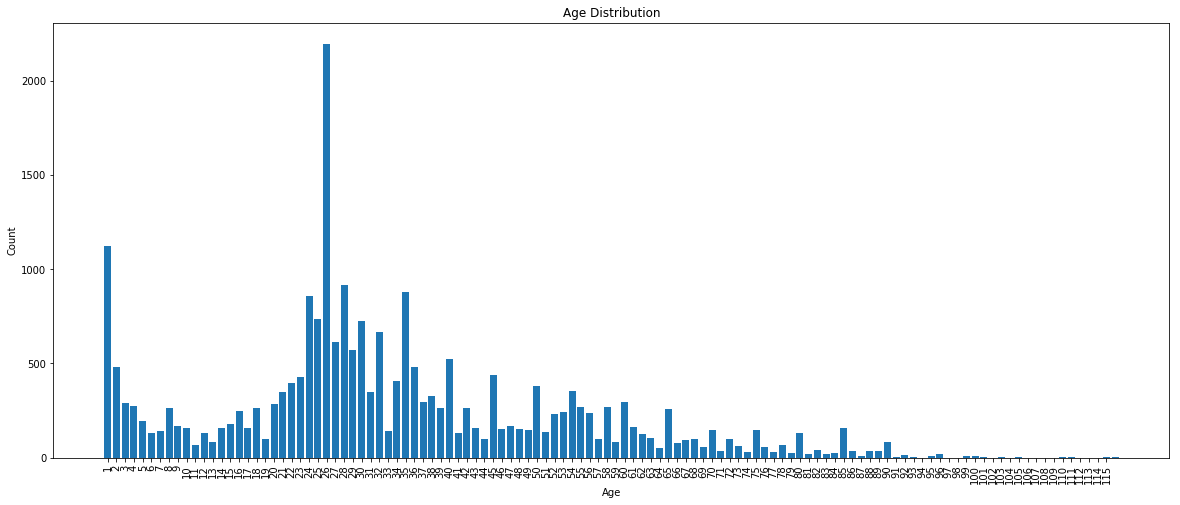

In [6]:
import matplotlib.pyplot as plt
y_map = list(map(int,ages))
x_ages = list(set(map(int, ages)))
# print("x: ",x_ages)
y_ages = [y_map.count(i) for i in x_ages]
# print("y: ",y_ages)
plt.figure(figsize=(20,8))
plt.xticks(np.arange(1, 116, step=1),rotation=90)
plt.bar(x_ages,y_ages)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

# Image Overview

Gender: Female  Age: 64


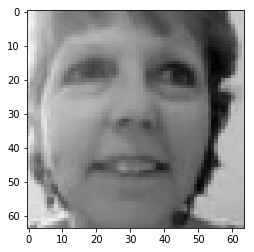

In [7]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 125
sample = images[idx]
if(genders[idx]==0):
    gender="Male"
else:
    gender="Female"
print("Gender:",gender," Age:",ages[idx])
display(sample)

In [8]:
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = int(ages[i])
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
# display(features[1])
# print("Age:", target[1][0])
# print("Gender:", target[1][1])
# print(features[1])
# print(len(target))
# print(len(features))

# Splitting dataset into test and training 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [10]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [13]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

# Building CNN Model for Age and Gender

In [14]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [15]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'Adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [18]:
history = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 25, batch_size=128)

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 5s 254us/step - loss: 263.9063 - dense_4_loss: 263.0461 - dense_10_loss: 0.6286 - dense_4_accuracy: 0.0262 - dense_10_accuracy: 0.6213 - val_loss: 158.9166 - val_dense_4_loss: 156.5520 - val_dense_10_loss: 0.5278 - val_dense_4_accuracy: 0.0331 - val_dense_10_accuracy: 0.8393
Epoch 2/25
18966/18966 [==============================] - 5s 256us/step - loss: 248.5720 - dense_4_loss: 247.3002 - dense_10_loss: 0.6160 - dense_4_accuracy: 0.0256 - dense_10_accuracy: 0.6309 - val_loss: 162.7157 - val_dense_4_loss: 160.5683 - val_dense_10_loss: 0.5092 - val_dense_4_accuracy: 0.0356 - val_dense_10_accuracy: 0.8330
Epoch 3/25
18966/18966 [==============================] - 5s 254us/step - loss: 235.4101 - dense_4_loss: 233.9124 - dense_10_loss: 0.6057 - dense_4_accuracy: 0.0283 - dense_10_accuracy: 0.6403 - val_loss: 111.2363 - val_dense_4_loss: 109.3558 - val_dense_10_loss: 0.4988 - val_dense_

In [19]:
model.save('data.h5')

In [21]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper right')
# plt.show()

# Results

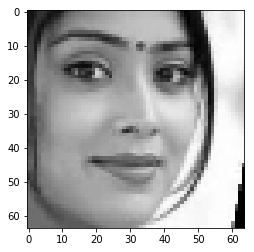

Actual Gender: Female Actual Age: 26
Predicted Gender: Female Predicted Age: 24
Predicted value of age is in desired range of (21, 31) 



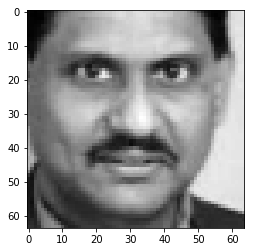

Actual Gender: Male Actual Age: 43
Predicted Gender: Male Predicted Age: 42
Predicted value of age is in desired range of (38, 48) 



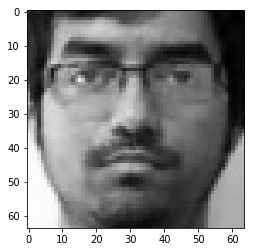

Actual Gender: Male Actual Age: 26
Predicted Gender: Male Predicted Age: 28
Predicted value of age is in desired range of (21, 31) 



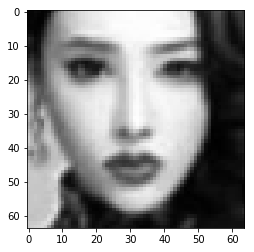

Actual Gender: Female Actual Age: 26
Predicted Gender: Female Predicted Age: 25
Predicted value of age is in desired range of (21, 31) 



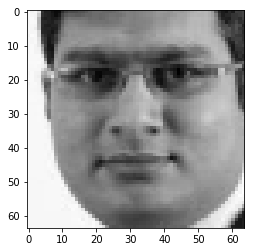

Actual Gender: Male Actual Age: 29
Predicted Gender: Male Predicted Age: 24
Predicted value of age is in desired range of (24, 34) 



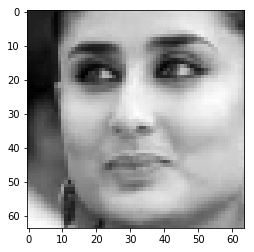

Actual Gender: Female Actual Age: 25
Predicted Gender: Female Predicted Age: 25
Predicted value of age is in desired range of (20, 30) 



In [22]:
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample,actual_age):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = int(np.round(val[0]))
    gender = get_gender(val[1])
    actual_age=int(actual_age)
    print("Predicted Gender:",gender,"Predicted Age:",age)
    if(actual_age-age<=5 and actual_age-age>=-5):
        if(actual_age-5<0):
            print("Predicted value of age is in desired range of",(0,actual_age+5),"\n")
        else:
            print("Predicted value of age is in desired range of",(actual_age-5,actual_age+5),"\n")
    else:
        if(actual_age-5<0):
            print("Predicted value of age is not in desired range of",(0,actual_age+5),"\n")
        else:
            print("Predicted value of age is not in desired range of",(actual_age-5,actual_age+5),"\n")
            
indexes = [5000,1000,138,876,549,256]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Actual Age:",ages[idx])
    res = get_result(sample,ages[idx])
    

# Done